<class 'pandas.core.frame.DataFrame'>
Int64Index: 162976 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162969 non-null  float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB
None
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
                                          clean_text  category  Sentiment
0  when modi promised “minimum government maximum...      -1.0  -0.300000
1  talk all the nonsense and continue all the dra...       0.0   0.000000
2  what did just say vote for modi  welcome bjp t...       1.0   

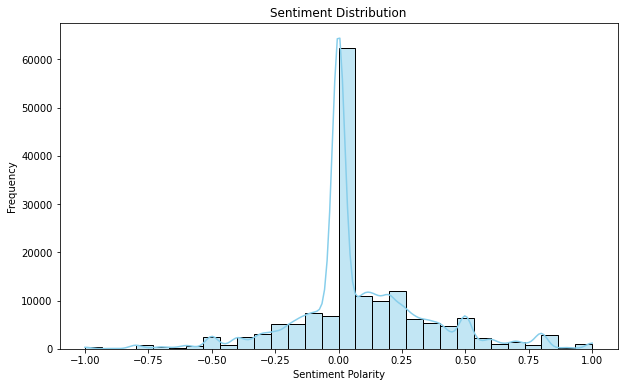

<ipython-input-6-e3af2054f08a>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='Sentiment', data=df, palette='viridis')


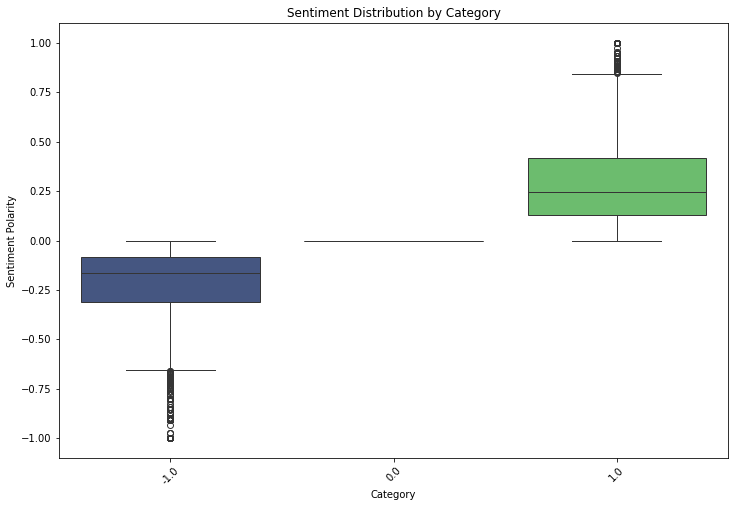

ValueError: Input y contains NaN.

In [6]:
import pandas as pd
import plotly
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from textblob import TextBlob  # Import TextBlob

# Read the dataset
df = pd.read_csv('Twitter_Data.csv')

# Drop NaN values in 'clean_text' before creating features and target variable
df = df.dropna(subset=['clean_text'])

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Sentiment Analysis
df['Sentiment'] = df['clean_text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Display the updated DataFrame with the sentiment column
print(df.head())

# Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sentiment Polarity')
plt.xticks(rotation=45)
plt.show()

# Machine Learning Algorithms (Optional)
X = df['clean_text']
y = df['category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a simple classifier (e.g., Support Vector Machine)
classifier = SVC(kernel='linear')
classifier.fit(X_train_vectorized, y_train)

# Evaluate the classifier
accuracy = classifier.score(X_test_vectorized, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')
